In [1]:
from config import load_config
from data import build_datasets, build_loader, build_detailed_test_dataloaders

In [2]:
def scene_tensor_to_txt(tensor):
    return ' '.join([processor.inv_vocabulary[t] for t in tensor.tolist()])

def print_scene_tensor(tensor):
    scene_text = scene_tensor_to_txt(tensor)
    print(scene_text.replace('[PAD]', '').replace('[SEP]','\n     '))
    
def print_parallel(tensor0, tensor1, tensor2, titles=None):
    if titles:
        ttl0, ttl1, ttl2 = titles
        print(f'{ttl0:7.7s} {ttl1:7.7s} {ttl2:7.7s}')
    for t0, t1, t2 in zip(
            tensor0.tolist(), tensor1.tolist(), tensor2.tolist()):
        w0 = processor.inv_vocabulary.get(t0, '')
        w1 = processor.inv_vocabulary.get(t1, '')
        w2 = processor.inv_vocabulary.get(t2, '')
        
        if w0 == '[SEP]':
            print()
            continue
        if w0 == '[PAD]':
            break
        
        print_txt = f'{w0:7.7s} {w1:7.7s} {w2:7.7s}'
        if w0 != w2:
            print_txt = bold(print_txt)
            

        print(print_txt)
        
def bold(text):
    return ("\033[1m" + text + "\033[0m")

In [3]:
exp_name = 'mmlm--n_colors=8c--mlm_probability=0.15'
resume_from_path = f'outputs/{exp_name}/last.ckpt'
# resume_from_path = f'outputs/{exp_name}/last-v1.ckpt'

config = load_config(exp_name)
# checkpoint = torch.load(resume_from_path)

Loading mmlm--n_colors=8c--mlm_probability=0.15 last checkpoint config from outputs/mmlm--n_colors=8c--mlm_probability=0.15/last.ckpt


In [4]:
train_dataset, test_dataset, systematic_dataset, cmn_systematic_dataset = build_datasets(config)
config.pad_idx = train_dataset.pad_idx

train_loader = build_loader(train_dataset, config, shuffle=True)
test_loader = build_loader(test_dataset, config, shuffle=False)
systematic_loader = build_loader(systematic_dataset, config, shuffle=False)
cmn_systematic_loader = build_loader(cmn_systematic_dataset, config, shuffle=False)
test_detailed_loaders = build_detailed_test_dataloaders(test_dataset, config)
systematic_detailed_loaders = build_detailed_test_dataloaders(systematic_dataset, config)
cmn_systematic_detailed_loaders = build_detailed_test_dataloaders(cmn_systematic_dataset, config)
train_data_args = {
    'train_dataloaders': train_loader,
    'val_dataloaders': [
            test_loader, systematic_loader,
            test_detailed_loaders['color'],
            systematic_detailed_loaders['color'],
            test_detailed_loaders['shapes'],
            systematic_detailed_loaders['shapes'],
            cmn_systematic_detailed_loaders['color'],
            cmn_systematic_detailed_loaders['shapes'],
            ],
}
test_data_args = {
    'dataloaders': [test_loader, systematic_loader, cmn_systematic_loader],
}

In [14]:
image, text = train_dataset[0]

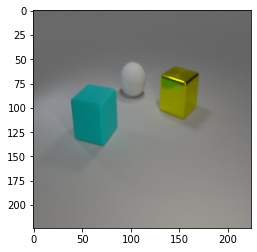

In [15]:
import matplotlib 
from matplotlib import pyplot as plt

plt.imshow(image.permute(1,2,0) + 0.5)

In [16]:
text

tensor([ 0, 59, 21, 77, 42,  2, 83, 20, 77, 84,  2, 59, 19, 66, 84,  2, 83, 20,
        77, 84,  2, 59, 20, 66, 42,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1])

In [17]:
processor = train_dataset.processor

In [18]:
images, scenes, labels = next(iter(train_loader))

In [37]:
images.shape, scenes.shape, labels.shape

(torch.Size([256, 3, 224, 224]), torch.Size([256, 60]), torch.Size([256, 256]))

In [40]:
(labels[:,:196] == -100).all()

tensor(True)

In [33]:
idx = 8

gd_tth  input   output 
[CLS]   [CLS]          
large   large          
#0000ff #0000ff        
metal   metal          
cube    cube           

large   large          
#ff0000 #ff0000        
rubber  rubber         
sphere  sphere         

large   large          
[MASK]  [MASK]  #0000ff
rubber  rubber         
sphere  sphere         

small   small          
[MASK]  [MASK]  #000000
metal   metal          
cylinde cylinde        

small   small          
#ff00ff #ff00ff        
rubber  rubber         
cylinde cylinde        

small   small          
#ff00ff #ff00ff        
rubber  rubber         
cylinde cylinde        

small   small          
#00ffff #00ffff        
[MASK]  [MASK]  metal  
cube    cube           

large   large          
#0000ff #0000ff        
rubber  rubber         
cube    cube           

small   small          
#ff0000 #ff0000        
metal   metal          
cylinde cylinde        


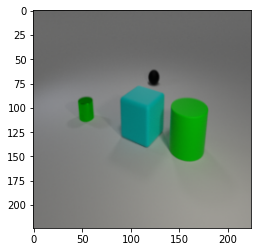

In [41]:
plt.imshow(images[idx,:,:,:].permute(1,2,0)+0.5)

print_parallel(
    scenes[idx,:],
    scenes[idx,:],
    labels[idx,:][-config.max_scene_size:],
    titles=['gd_tth', 'input', 'output'],
)

In [28]:
for a, b in zip(scenes[idx].tolist(), labels[idx][-config.max_scene_size:].tolist()):
    if b != -100:
        print(a, b)

3 42
20 18


In [44]:
!ls '/workspace1/fidelrio/CLEVR_CoGenT_v1.0/colored-v2/8c/scenes'

CLEVR_testA_scenes.json  CLEVR_trainA_scenes.json  CLEVR_valC_scenes.json
CLEVR_testB_scenes.json  CLEVR_valA_scenes.json
CLEVR_testC_scenes.json  CLEVR_valB_scenes.json


In [67]:
!ls /mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/output/scenes/multicolored-v2/8c1/trainA/CLEVR_new_000000.json

CLEVR_new_000000.json  CLEVR_new_005000.json  CLEVR_new_010000.json
CLEVR_new_000001.json  CLEVR_new_005001.json  CLEVR_new_010001.json
CLEVR_new_000002.json  CLEVR_new_005002.json  CLEVR_new_010002.json
CLEVR_new_000003.json  CLEVR_new_005003.json  CLEVR_new_010003.json
CLEVR_new_000004.json  CLEVR_new_005004.json  CLEVR_new_010004.json
CLEVR_new_000005.json  CLEVR_new_005005.json  CLEVR_new_010005.json
CLEVR_new_000006.json  CLEVR_new_005006.json  CLEVR_new_010006.json
CLEVR_new_000007.json  CLEVR_new_005007.json  CLEVR_new_010007.json
CLEVR_new_000008.json  CLEVR_new_005008.json  CLEVR_new_010008.json
CLEVR_new_000009.json  CLEVR_new_005009.json  CLEVR_new_010009.json
CLEVR_new_000010.json  CLEVR_new_005010.json  CLEVR_new_010010.json
CLEVR_new_000011.json  CLEVR_new_005011.json  CLEVR_new_010011.json
CLEVR_new_000012.json  CLEVR_new_005012.json  CLEVR_new_010012.json
CLEVR_new_000013.json  CLEVR_new_005013.json  CLEVR_new_010013.json
CLEVR_new_000014.json  CLEVR_new_005014.json  CL

CLEVR_new_003706.json  CLEVR_new_008706.json  CLEVR_new_013706.json
CLEVR_new_003707.json  CLEVR_new_008707.json  CLEVR_new_013707.json
CLEVR_new_003708.json  CLEVR_new_008708.json  CLEVR_new_013708.json
CLEVR_new_003709.json  CLEVR_new_008709.json  CLEVR_new_013709.json
CLEVR_new_003710.json  CLEVR_new_008710.json  CLEVR_new_013710.json
CLEVR_new_003711.json  CLEVR_new_008711.json  CLEVR_new_013711.json
CLEVR_new_003712.json  CLEVR_new_008712.json  CLEVR_new_013712.json
CLEVR_new_003713.json  CLEVR_new_008713.json  CLEVR_new_013713.json
CLEVR_new_003714.json  CLEVR_new_008714.json  CLEVR_new_013714.json
CLEVR_new_003715.json  CLEVR_new_008715.json  CLEVR_new_013715.json
CLEVR_new_003716.json  CLEVR_new_008716.json  CLEVR_new_013716.json
CLEVR_new_003717.json  CLEVR_new_008717.json  CLEVR_new_013717.json
CLEVR_new_003718.json  CLEVR_new_008718.json  CLEVR_new_013718.json
CLEVR_new_003719.json  CLEVR_new_008719.json  CLEVR_new_013719.json
CLEVR_new_003720.json  CLEVR_new_008720.json  CL

In [68]:
import json
base_path = '/workspace1/fidelrio/CLEVR_CoGenT_v1.0/colored-v2/8c'
# base_path = '/mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/output/scenes/multicolored-v2/8c1/trainA'
with open(base_path + '/scenes/CLEVR_trainA_scenes.json') as fp:
    scenes = json.load(fp)

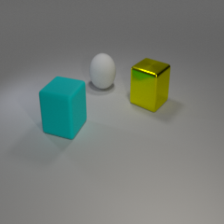

In [69]:
from PIL import Image

img_path = base_path + '/images/trainA/' + scenes['scenes'][0]['image_filename']
Image.open(img_path)

In [70]:
scenes['scenes'][0]['objects']

[{'shape': 'sphere',
  'rotation': 154.21396175987638,
  'size': 'large',
  'color': '#00ffff',
  'pixel_coords': [183, 113, 9.96343994140625],
  'material': 'metal',
  '3d_coords': [1.1844017505645752, -0.19398339092731476, 0.699999988079071]},
 {'shape': 'sphere',
  'rotation': 349.8627393309388,
  'size': 'small',
  'color': '#ff0000',
  'pixel_coords': [141, 96, 12.121199607849121],
  'material': 'rubber',
  '3d_coords': [-1.352484941482544, 0.3041282892227173, 0.3499999940395355]},
 {'shape': 'cylinder',
  'rotation': 251.3884556254734,
  'size': 'large',
  'color': '#ff0000',
  'pixel_coords': [71, 93, 11.373292922973633],
  'material': 'metal',
  '3d_coords': [-2.3243091106414795, -1.7821869850158691, 0.699999988079071]},
 {'shape': 'sphere',
  'rotation': 147.97178931843175,
  'size': 'small',
  'color': '#ff0000',
  'pixel_coords': [245, 114, 10.776054382324219],
  'material': 'rubber',
  '3d_coords': [1.9572272300720215, 1.7768056392669678, 0.3499999940395355]},
 {'shape': 'c

In [73]:
scene0_path = '/mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/output/scenes/multicolored-v2/8c1/trainA/CLEVR_new_000000.json'
with open(scene0_path) as fp:
    scene0 = json.load(fp)

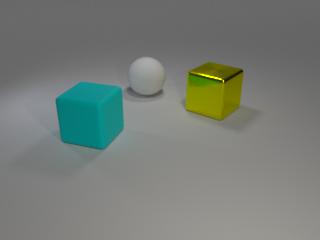

In [74]:
from PIL import Image

img_path = '/mnt/ialabnas/homes/fidelrio/clevr-dataset-gen/output/images/multicolored-v2/8c1/trainA/' + scene0['image_filename']
Image.open(img_path)

In [76]:
scene0['objects']

[{'shape': 'cube',
  'color': '#00ffff',
  'pixel_coords': [92, 114, 9.947720527648926],
  'rotation': 280.134338798295,
  '3d_coords': [-0.4884148836135864, -2.1263790130615234, 0.699999988079071],
  'size': 'large',
  'material': 'rubber'},
 {'shape': 'sphere',
  'color': '#ffffff',
  'pixel_coords': [147, 76, 12.742910385131836],
  'rotation': 297.5151881033337,
  '3d_coords': [-1.946494698524475, 1.0077100992202759, 0.699999988079071],
  'size': 'large',
  'material': 'rubber'},
 {'shape': 'cube',
  'color': '#ffff00',
  'pixel_coords': [214, 90, 11.569726943969727],
  'rotation': 4.927762402246558,
  '3d_coords': [0.5324538946151733, 1.8995115756988525, 0.699999988079071],
  'size': 'large',
  'material': 'metal'}]